In [1456]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1457]:
data=pd.read_csv('hmeq.csv')

In [1458]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [1459]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [1460]:
data.shape

(5960, 13)

In [1461]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [1462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 558.8+ KB


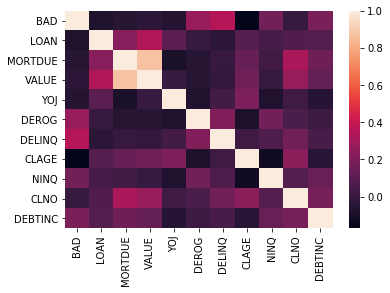

In [1463]:
sns.heatmap(data.corr())

In [1464]:
data.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


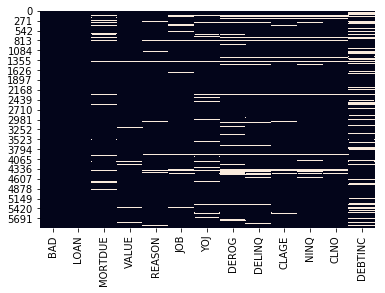

In [1465]:
sns.heatmap(data.isnull(),cbar=False)

In [1466]:
nullrow=data.apply(lambda x: x.count(), axis=1)
nullrow.head()

0    12
1    12
2    12
3     2
4    12
dtype: int64

In [1467]:
data['full_count']=nullrow
ndata=data.loc[data["full_count"]>7]
ndata.shape

(5768, 14)

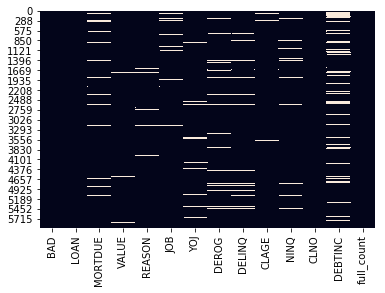

In [1468]:
sns.heatmap(ndata.isnull(),cbar=False)

In [1119]:
#CATEGORICAL VALUES

In [1469]:
ndata['REASON'].value_counts()

DebtCon    3876
HomeImp    1726
Name: REASON, dtype: int64

In [1470]:
reason=pd.get_dummies(ndata['REASON'],drop_first=True)
reason.head(5)

,HomeImp
0,1
1,1
2,1
4,1
5,1


In [1471]:
ndata['JOB'].value_counts()

Other      2360
ProfExe    1268
Office      942
Mgr         752
Self        191
Sales       109
Name: JOB, dtype: int64

In [1472]:
ndata['JOB'].isnull().sum()

146

In [1473]:
ndata['JOB'].fillna('Other',inplace=True)
ndata['JOB'].isnull().sum()

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0

In [1474]:
job=pd.get_dummies(ndata['JOB'],drop_first=True)
job.head(5)

,Office,Other,ProfExe,Sales,Self
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
4,1,0,0,0,0
5,0,1,0,0,0


In [1475]:
ndata=pd.concat([ndata,reason,job],axis=1)
ndata.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,full_count,HomeImp,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,12,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,12,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,12,1,0,1,0,0,0
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,12,1,1,0,0,0,0
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,13,1,0,1,0,0,0


In [1476]:
ndata.drop(['REASON','JOB'],axis=1,inplace=True)
ndata.head()

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,full_count,HomeImp,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,12,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,12,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,12,1,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,12,1,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,13,1,0,1,0,0,0


In [1477]:
ndata.shape

(5768, 18)

In [1478]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5768 entries, 0 to 5959
Data columns (total 18 columns):
BAD           5768 non-null int64
LOAN          5768 non-null int64
MORTDUE       5336 non-null float64
VALUE         5675 non-null float64
YOJ           5374 non-null float64
DEROG         5251 non-null float64
DELINQ        5379 non-null float64
CLAGE         5648 non-null float64
NINQ          5449 non-null float64
CLNO          5733 non-null float64
DEBTINC       4564 non-null float64
full_count    5768 non-null int64
HomeImp       5768 non-null uint8
Office        5768 non-null uint8
Other         5768 non-null uint8
ProfExe       5768 non-null uint8
Sales         5768 non-null uint8
Self          5768 non-null uint8
dtypes: float64(9), int64(3), uint8(6)
memory usage: 619.6 KB


In [1479]:
#MISSING VALUES

In [1480]:
data.isnull().sum()

BAD              0
LOAN             0
MORTDUE        518
VALUE          112
REASON         252
JOB            279
YOJ            515
DEROG          708
DELINQ         580
CLAGE          308
NINQ           510
CLNO           222
DEBTINC       1267
full_count       0
dtype: int64

In [1481]:
data.isnull().mean()*100

BAD            0.000000
LOAN           0.000000
MORTDUE        8.691275
VALUE          1.879195
REASON         4.228188
JOB            4.681208
YOJ            8.640940
DEROG         11.879195
DELINQ         9.731544
CLAGE          5.167785
NINQ           8.557047
CLNO           3.724832
DEBTINC       21.258389
full_count     0.000000
dtype: float64

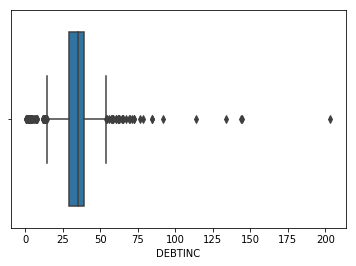

In [1482]:
sns.boxplot(x='DEBTINC',data=ndata)

In [1483]:
def find_rep(col,x,y):
    inrange=[]
    outrange=[]
    for i in col:
        if math.isnan(i)==False:
            if i>x or i<y:
                outrange.append(i)
            elif i<x and i>y:
                inrange.append(i)              
    rep=(np.mean(outrange)+np.mean(inrange))/2
    return rep

In [1484]:
rep=find_rep(ndata['DEBTINC'],52,15)
rep

34.713196545629536

In [1485]:
ndata['DEBTINC'].fillna(rep,inplace=True)
ndata['DEBTINC'].isnull().sum()

0

In [1486]:
ndata['DEROG'].value_counts()

0.0     4526
1.0      435
2.0      160
3.0       58
4.0       23
6.0       15
5.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

In [1487]:
ndata['DEROG'].fillna(0,inplace=True)
ndata['DEROG'].isnull().sum()

0

In [1488]:
ndata['DELINQ'].value_counts()

0.0     4178
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
13.0       1
12.0       1
15.0       1
Name: DELINQ, dtype: int64

In [1489]:
ndata['DELINQ'].fillna(0,inplace=True)
ndata['DELINQ'].isnull().sum()

0

In [1490]:
ndata['NINQ'].value_counts()

0.0     2530
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
13.0       2
12.0       2
17.0       1
14.0       1
Name: NINQ, dtype: int64

In [1491]:
ndata['NINQ'].fillna(0,inplace=True)
ndata['NINQ'].isnull().sum()

0

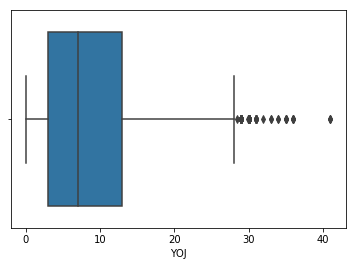

In [1492]:
sns.boxplot(x='YOJ',data=ndata)

In [1493]:
rep=find_rep(ndata['YOJ'],27,0)
rep

19.563570469176973

In [1494]:
ndata['YOJ'].fillna(rep,inplace=True)
ndata['YOJ'].isnull().sum()

0

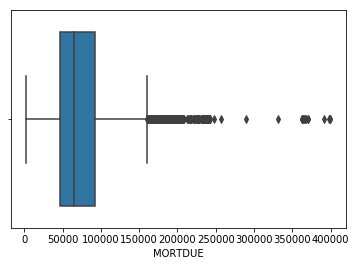

In [1495]:
sns.boxplot(x='MORTDUE',data=ndata)

In [1496]:
rep=find_rep(ndata['MORTDUE'],150000,0)
rep

133657.6865720325

In [1497]:
ndata['MORTDUE'].fillna(rep,inplace=True)
ndata['MORTDUE'].isnull().sum()

0

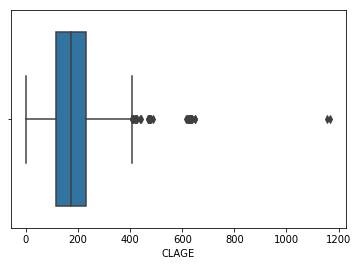

In [1498]:
sns.boxplot(x='CLAGE',data=ndata)

In [1499]:
rep=find_rep(ndata['CLAGE'],400,0)
rep

348.1942910190842

In [1500]:
ndata['CLAGE'].fillna(rep,inplace=True)
ndata['CLAGE'].isnull().sum()

0

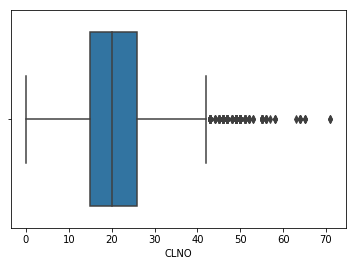

In [1501]:
sns.boxplot(x='CLNO',data=ndata)

In [1502]:
rep=find_rep(ndata['CLNO'],40,0)
rep

33.84099124277995

In [1503]:
ndata['CLNO'].fillna(rep,inplace=True)
ndata['CLNO'].isnull().sum()

0

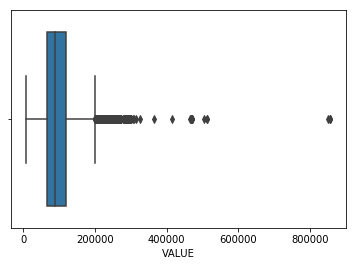

In [1504]:
sns.boxplot(x='VALUE',data=ndata)

In [1505]:
rep=find_rep(ndata['VALUE'],200000,0)
rep

175669.79327279268

In [1506]:
ndata['VALUE'].fillna(rep,inplace=True)
ndata['VALUE'].isnull().sum()

0

In [1507]:
ndata.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
YOJ           0
DEROG         0
DELINQ        0
CLAGE         0
NINQ          0
CLNO          0
DEBTINC       0
full_count    0
HomeImp       0
Office        0
Other         0
ProfExe       0
Sales         0
Self          0
dtype: int64

In [1508]:
del ndata['full_count']

In [1509]:
ndata.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.713197,1,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.713197,1,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.713197,1,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.713197,1,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0


In [1510]:
#FEATURE ANALYSIS

In [1511]:
ndata.skew()

BAD        1.520313
LOAN       2.018535
MORTDUE    1.435147
VALUE      2.935026
YOJ        0.738164
DEROG      5.590478
DELINQ     4.177932
CLAGE      1.236218
NINQ       2.692323
CLNO       0.756160
DEBTINC    3.304245
HomeImp    0.877067
Office     1.822104
Other      0.264486
ProfExe    1.353376
Sales      7.068428
Self       5.219901
dtype: float64

C:\Users\USER\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


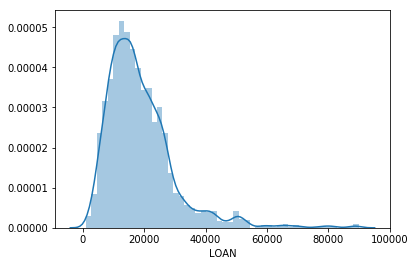

In [1512]:
sns.distplot(ndata["LOAN"])

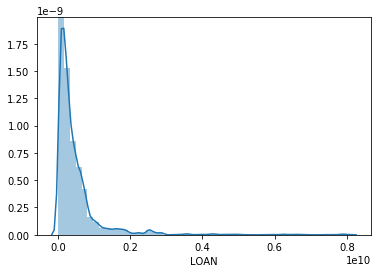

In [1164]:
loan_square = (ndata["LOAN"])**2
sns.distplot(loan_square)

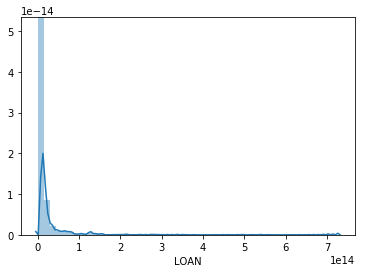

In [1165]:
loan_cube = (ndata["LOAN"])**3
sns.distplot(loan_cube)

In [1166]:
ndata["LOAN1"] = loan_square
ndata.drop("LOAN",axis=1,inplace=True)
ndata.head()

,BAD,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self,LOAN1
0,1,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.713197,1,0,1,0,0,0,1210000
1,1,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.713197,1,0,1,0,0,0,1690000
2,1,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.713197,1,0,1,0,0,0,2250000
4,0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.713197,1,1,0,0,0,0,2890000
5,1,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0,2890000


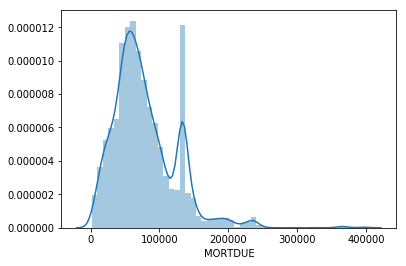

In [1167]:
sns.distplot(ndata['MORTDUE'])

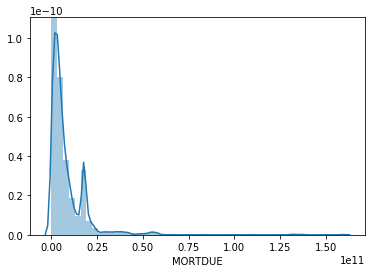

In [1168]:
mort_square=ndata['MORTDUE']**2
sns.distplot(mort_square)

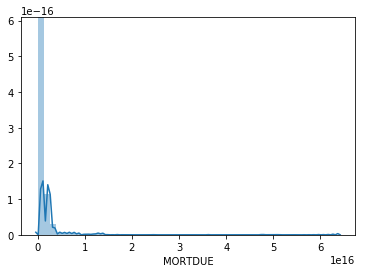

In [1169]:
mort_cube=ndata['MORTDUE']**3
sns.distplot(mort_cube)

In [1170]:
ndata["MORTDUE1"] = mort_square
ndata.drop("MORTDUE",axis=1,inplace=True)
ndata.head()

,BAD,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self,LOAN1,MORTDUE1
0,1,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.713197,1,0,1,0,0,0,1210000,6.687396e+08
1,1,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.713197,1,0,1,0,0,0,1690000,4.907423e+09
2,1,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.713197,1,0,1,0,0,0,2250000,1.822500e+08
4,0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.713197,1,1,0,0,0,0,2890000,9.564840e+09
5,1,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0,1,0,0,0,2890000,9.331803e+08


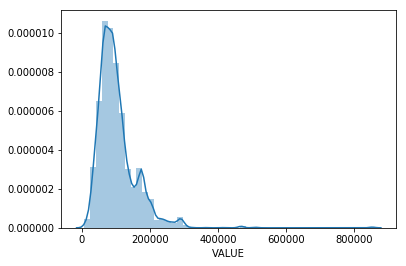

In [1171]:
sns.distplot(ndata['VALUE'])

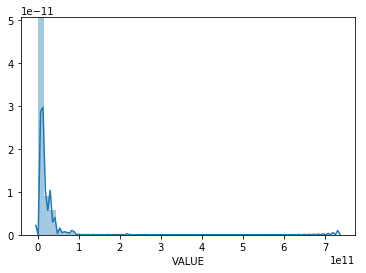

In [1172]:
mort_square=ndata['VALUE']**2
sns.distplot(mort_square)

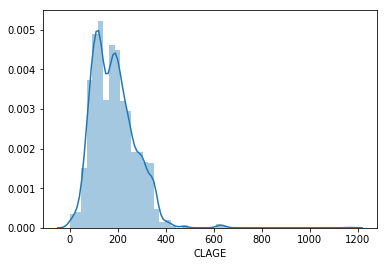

In [1173]:
sns.distplot(ndata['CLAGE'])

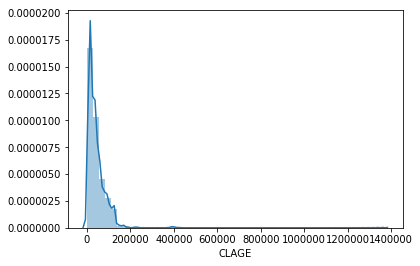

In [1174]:
clage_square = (ndata["CLAGE"])**2
sns.distplot(clage_square)

In [1175]:
ndata["CLAGE1"] = clage_square
ndata.drop("CLAGE",axis=1,inplace=True)
ndata.head()

,BAD,VALUE,YOJ,DEROG,DELINQ,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self,LOAN1,MORTDUE1,CLAGE1
0,1,39025.0,10.5,0.0,0.0,1.0,9.0,34.713197,1,0,1,0,0,0,1210000,6.687396e+08,8905.067778
1,1,68400.0,7.0,0.0,2.0,0.0,14.0,34.713197,1,0,1,0,0,0,1690000,4.907423e+09,14843.361110
2,1,16700.0,4.0,0.0,0.0,1.0,10.0,34.713197,1,0,1,0,0,0,2250000,1.822500e+08,22340.284445
4,0,112000.0,3.0,0.0,0.0,0.0,14.0,34.713197,1,1,0,0,0,0,2890000,9.564840e+09,8711.111111
5,1,40320.0,9.0,0.0,0.0,1.0,8.0,37.113614,1,0,1,0,0,0,2890000,9.331803e+08,10295.349544


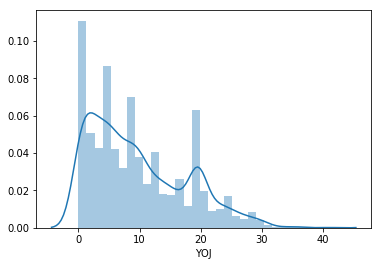

In [1176]:
sns.distplot(ndata['YOJ'])

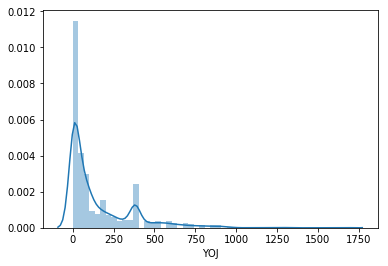

In [1177]:
yoj_square = (ndata["YOJ"])**2
sns.distplot(yoj_square)

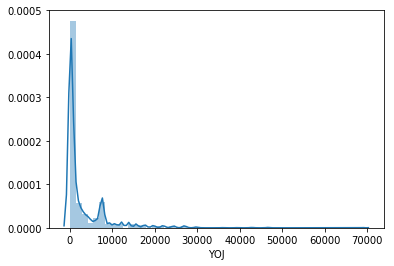

In [1178]:
yoj_cube = (ndata["YOJ"])**3
sns.distplot(yoj_cube)

In [1179]:
ndata["YOJ1"] = yoj_cube
ndata.drop("YOJ",axis=1,inplace=True)
ndata.head()

,BAD,VALUE,DEROG,DELINQ,NINQ,CLNO,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self,LOAN1,MORTDUE1,CLAGE1,YOJ1
0,1,39025.0,0.0,0.0,1.0,9.0,34.713197,1,0,1,0,0,0,1210000,6.687396e+08,8905.067778,1157.625
1,1,68400.0,0.0,2.0,0.0,14.0,34.713197,1,0,1,0,0,0,1690000,4.907423e+09,14843.361110,343.000
2,1,16700.0,0.0,0.0,1.0,10.0,34.713197,1,0,1,0,0,0,2250000,1.822500e+08,22340.284445,64.000
4,0,112000.0,0.0,0.0,0.0,14.0,34.713197,1,1,0,0,0,0,2890000,9.564840e+09,8711.111111,27.000
5,1,40320.0,0.0,0.0,1.0,8.0,37.113614,1,0,1,0,0,0,2890000,9.331803e+08,10295.349544,729.000


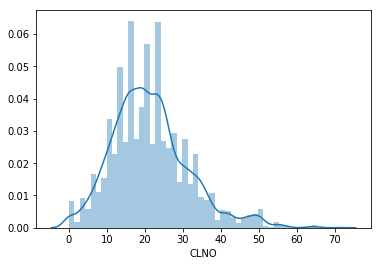

In [1180]:
sns.distplot(ndata['CLNO'])

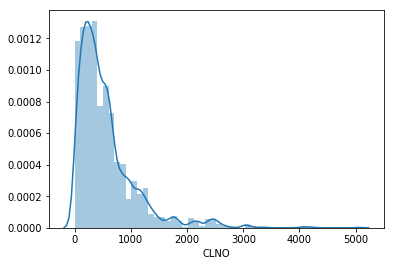

In [1181]:
clno_square=ndata['CLNO']**2
sns.distplot(clno_square)

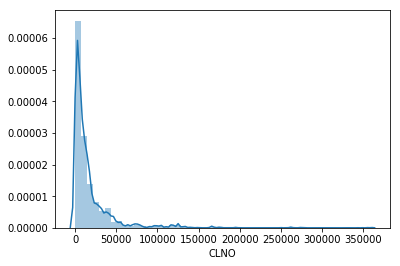

In [1182]:
clno_cube=ndata['CLNO']**3
sns.distplot(clno_cube)

In [1183]:
ndata["CLNO1"] = clno_cube
ndata.drop("CLNO",axis=1,inplace=True)
ndata.head()

,BAD,VALUE,DEROG,DELINQ,NINQ,DEBTINC,HomeImp,Office,Other,ProfExe,Sales,Self,LOAN1,MORTDUE1,CLAGE1,YOJ1,CLNO1
0,1,39025.0,0.0,0.0,1.0,34.713197,1,0,1,0,0,0,1210000,6.687396e+08,8905.067778,1157.625,729.0
1,1,68400.0,0.0,2.0,0.0,34.713197,1,0,1,0,0,0,1690000,4.907423e+09,14843.361110,343.000,2744.0
2,1,16700.0,0.0,0.0,1.0,34.713197,1,0,1,0,0,0,2250000,1.822500e+08,22340.284445,64.000,1000.0
4,0,112000.0,0.0,0.0,0.0,34.713197,1,1,0,0,0,0,2890000,9.564840e+09,8711.111111,27.000,2744.0
5,1,40320.0,0.0,0.0,1.0,37.113614,1,0,1,0,0,0,2890000,9.331803e+08,10295.349544,729.000,512.0


In [1184]:
ndata.skew()

BAD         1.520313
VALUE       2.935026
DEROG       5.590478
DELINQ      4.177932
NINQ        2.692323
DEBTINC     3.304245
HomeImp     0.877067
Office      1.822104
Other       0.264486
ProfExe     1.353376
Sales       7.068428
Self        5.219901
LOAN1       5.160744
MORTDUE1    5.409927
CLAGE1      9.560948
YOJ1        3.514622
CLNO1       4.207876
dtype: float64

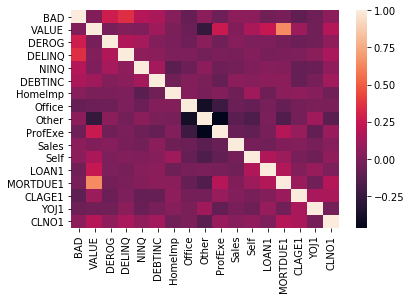

In [1185]:
sns.heatmap(ndata.corr())

In [1186]:
#Class imbalance

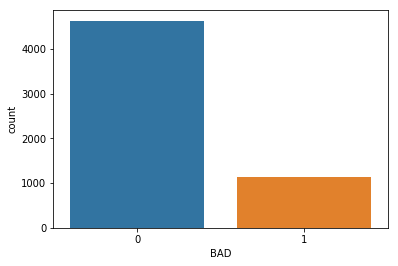

In [1187]:
sns.countplot(x="BAD",data=ndata)

In [1188]:
from sklearn.utils import resample
df_maj=ndata[ndata.BAD==0]
df_min=ndata[ndata.BAD==1]
df_min_upsample=resample(df_min,replace=True,n_samples=4600,random_state=123)
df_up=pd.concat([df_maj,df_min_upsample])
df_up.BAD.value_counts()

0    4629
1    4600
Name: BAD, dtype: int64

In [1189]:
df_maj_downsample=resample(df_maj,replace=True,n_samples=1100,random_state=123)
df_down=pd.concat([df_min,df_maj_downsample])
df_down.BAD.value_counts()

1    1139
0    1100
Name: BAD, dtype: int64

In [1190]:
#feature selection

In [1191]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
X=ndata.drop("BAD",axis=1)
Y=ndata["BAD"]
bestfeature=SelectKBest(score_func=f_classif,k=3)
fit=bestfeature.fit(X,Y)
sc=pd.DataFrame(fit.scores_)
ndatacolumns=pd.DataFrame(X.columns)
featurescore=pd.concat([ndatacolumns,sc],axis=1)
featurescore.columns=["Specs","Scores"]
print(featurescore)

       Specs      Scores
0      VALUE    0.790687
1      DEROG  480.135520
2     DELINQ  838.782715
3       NINQ  196.587808
4    DEBTINC  131.812295
5    HomeImp    4.750646
6     Office   36.169596
7      Other   11.665486
8    ProfExe   13.167451
9      Sales   16.056620
10      Self   11.440839
11     LOAN1    7.484401
12  MORTDUE1    1.476357
13    CLAGE1   57.601106
14      YOJ1   17.368470
15     CLNO1   13.761405


In [1192]:
print(featurescore.nlargest(8,"Scores"))

      Specs      Scores
2    DELINQ  838.782715
1     DEROG  480.135520
3      NINQ  196.587808
4   DEBTINC  131.812295
13   CLAGE1   57.601106
6    Office   36.169596
14     YOJ1   17.368470
9     Sales   16.056620


In [1193]:
used_features=['DELINQ',"DEROG","NINQ","DEBTINC","CLAGE1","Office",'YOJ1','Sales']
ndata[used_features].head()

,DELINQ,DEROG,NINQ,DEBTINC,CLAGE1,Office,YOJ1,Sales
0,0.0,0.0,1.0,34.713197,8905.067778,0,1157.625,0
1,2.0,0.0,0.0,34.713197,14843.361110,0,343.000,0
2,0.0,0.0,1.0,34.713197,22340.284445,0,64.000,0
4,0.0,0.0,0.0,34.713197,8711.111111,1,27.000,0
5,0.0,0.0,1.0,37.113614,10295.349544,0,729.000,0


In [1194]:
#Model:

In [1390]:
y=df_up.BAD
x=df_up[used_features]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1391]:
predictions=logmodel.predict(x_test)
print(predictions[0])

1


In [1392]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7165041531238714

In [1393]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[1111,  263],
       [ 522,  873]], dtype=int64)

In [1394]:
y=df_down.BAD
x=df_down[used_features]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1395]:
predictions=logmodel.predict(x_test)
print(predictions[0])

0


In [1396]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7157738095238095

In [1397]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[266,  59],
       [132, 215]], dtype=int64)

In [1409]:
y=df_up.BAD
x=df_up[used_features]
from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier(criterion="entropy",random_state=10,max_depth=9)
dmodel.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [1410]:
y_pred=dmodel.predict(x_test)
print(y_pred[0])

0


In [1411]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8214285714285714

In [1412]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[266,  59],
       [132, 215]], dtype=int64)

In [1413]:
#Naive Bayes

In [1414]:
y=df_down.BAD
x=df_down[used_features]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=220)
from sklearn.naive_bayes import GaussianNB
gmodel = GaussianNB()
gmodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [1415]:
y_pred=gmodel.predict(x_test)
y_pred[0]

0

In [1416]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6532738095238095

In [1417]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[214, 139],
       [184, 135]], dtype=int64)

In [1418]:
#KNN

In [1419]:
y=df_down.BAD
x=df_down[used_features]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=90)
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=11)
kmodel.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [1420]:
y_pred=kmodel.predict(x_test)
y_pred[0]

1

In [1421]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6116071428571429

In [1422]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[186, 149],
       [212, 125]], dtype=int64)

In [1423]:
#Random forest

In [1434]:
y=df_down.BAD
x=df_down[used_features]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=150)
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(n_estimators=13)
ranmodel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1435]:
y_pred=ranmodel.predict(x_test)
y_pred[0]

1

In [1436]:
ranmodel.score(x_test,y_test)

0.8601190476190477

In [1437]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[196, 118],
       [202, 156]], dtype=int64)

In [1438]:
#Voting

In [1439]:
y=df_down.BAD
x=df_down[used_features]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=250)
from sklearn.ensemble import VotingClassifier
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
vmodel=VotingClassifier(estimators=[('lr',logmodel),('dt',dmodel),('nb',gmodel)])
vmodel.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('dt', Decision...andom_state=10,
            splitter='best')), ('nb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [1440]:
vmodel.score(x_test,y_test)

0.7544642857142857

In [1441]:
from sklearn.metrics import confusion_matrix
res=confusion_matrix(y_test,predictions)
res

array([[190, 128],
       [208, 146]], dtype=int64)